## Problem 4: Fourier Analysis

The goal of this problem is to help you practice (further) on the following topics:

1. Python functions
2. if/else statements
3. Numpy's arrays
4. Fourier series 

We will work with the following periodic signal with period $T_s=2$ sec:
$$
x(t) = \begin{cases} 1, & 0 \le t < 1/2,\\
0, & 1/2 \le t < 3/2, \\
2, & 3/2 \le t < 2.
\end{cases}
$$
and
$$
x(t+2)=x(t), \qquad \forall t.
$$

### 1.1 Plot signal in time domain

We will start by writing code that plots two periods of this signal. Consider the following fine discretization of the time variable $t$:

In [22]:
import numpy as np
fs = 44100     # sampling frequency

t_max = 4    # set to two periods
N = int(t_max*fs)
# Create an array of time
t = np.linspace(0,t_max,N)

For each point in time, we can output a value of the function $x(t)$.

<font color='red'>**Exercise 1.1.1**</font> <font color='magenta'> **[2pt]** </font> Using `if-statements`, create a python function that takes a time instant $t$ as its input and outputs the signal value $x(t)$ at that time.

In [23]:
def stair_signal_value(time):

    # insert some if statements that will return the value of the function at a specific time between 0 and 4 seconds 
    val = 0
    if time < 1/2:
        val = 1
    elif time < 3/2:
        val = 0
    elif time < 2:
        val = 2
    else:
        val = stair_signal_value(time-2)

    return val

One way to represent the signal $x(t)$ in Python, is by storing its values in an array.

<font color='red'>**Exercise 1.1.2**</font> <font color='magenta'> **[2pt]** </font> Following the steps below, construct an array whose elements are the values of the signal $x(t)$ over two time periods.

To construct our signal, first initialize it as an array of zeros of the correct length.

In [24]:
length = len(t) # Get this from the array t
xt = np.zeros(length)

Now loop through the time array. 

At each iteration, update the corresponding element of the *signal vector*. Do this by calling the function you defined previously.

In [25]:
for i in range(length):
    
    time = t[i] # get the time at the current iteration
    
    val = stair_signal_value(time) # find the value of the function at that time
    
    # Now assign it to the corresponding element of the signal vector
    xt[i] = val


By now we should have our signal vector xt. Plot it to make sure it's as we expect.

If not, go back and fix your code above.

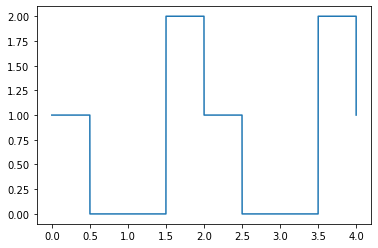

In [26]:
%matplotlib inline  
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t,xt)

### 1.2 Fourier synthesis

Next, we wish to construct the same signal from its Fourier Series coefficients (also known as Fourier synthesis). 

Recall that if we want to build this signal from its Fourier Series coefficients, we do it as follows: $$\hat{x}(t)={A_0}/{2}+\sum_{k=1}^{\infty}A_k\cos(\pi k t ) + B_k\sin(\pi k t )$$

We will build the signal sequentially. 

<font color='red'>**Exercise 1.2.0**</font> <font color='magenta'> **[5pt]** </font> Compute the Fourier coefficients $A_0,A_1,A_2,\ldots$ and $B_1,B_2,\ldots$. **Show your work on paper in the Problem set AND input your answer below.**

The Fourier coefficients are as follows (see the written section for derivations):

$$
\begin{align*}
    & A_0 = \frac32 \\
    & A_k = \frac{3}{\pi k}\sin(\frac\pi2k) , \text{for}~~  k=1,2,3,\ldots\\
    & B_k = \frac1{\pi k}(\cos(\frac\pi2 k)-1) , \text{for}~~ k=1,2,3,\ldots\\
\end{align*}
$$


<font color='red'>**Exercise 1.2.1**</font> <font color='magenta'> **[1pt]** </font> First, create and plot a signal of the correct length where each element has value $A_0/2$ (i.e., the DC-term): $$x_0(t) = A_0/2$$

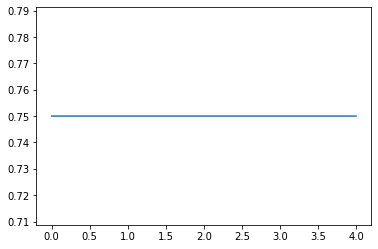

In [27]:
A_0 = 1.5
x0 = np.ones(length)* A_0/2

fig, ax = plt.subplots()
ax.plot(t,x0)

<font color='red'>**Exercise 1.2.2**</font> <font color='magenta'> **[2pt]** </font> Define functions that take as input an integer $k$ and return the corresponding Fourier series coefficients $A_k$ and $B_k$ associated with that 'harmonic'

In [28]:
def Ak(k):
    
    # Handle the special case that k = 0
    if k == 0:
        return A_0
    # Otherwise, handle the case that k > 0
    val = 3 / np.pi / k * np.sin(np.pi / 2 * k)
    return val

def Bk(k):
    # Handle the special case that k = 0
    if k == 0:
        return 0
    # Otherwise, handle the case that k > 0
    val = 1 / np.pi / k * (np.cos(np.pi / 2 * k) - 1)
    return val

<font color='red'>**Exercise 1.2.3**</font><font color='magenta'> **[1pt]** </font> Create and plot a signal that has the first two terms: 
$$
\begin{align*}
    x_1(t) &= A_0/2 + A_1\cos( \pi t) + B_1 \sin( \pi t) \\
    &= x_0(t) + A_1\cos( \pi t) + B_1 \sin( \pi t)
\end{align*}
$$

Note that we don't have to start from scratch, we can just a new part to the signal we already made, called `x0`.

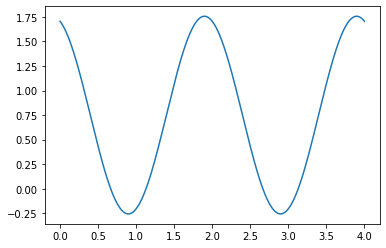

In [29]:
# Hint: for A1 and B1 we can use the functions we defined above to give us the coefficients
A1 = Ak(1)
B1 = Bk(1)
x1 = x0 + A1 * np.cos(np.pi * t) + B1 * np.sin(np.pi * t)

fig, ax = plt.subplots()
ax.plot(t,x1)

<font color='red'>**Exercise 1.2.4**</font><font color='magenta'> **[1pt]** </font> Now do this with the first three terms:
$$
\begin{align*}
    x_2(t) &= A_0/2 + A_1\cos(\pi t) + B_1 \sin( \pi t) + A_2\cos(2 \pi t) + B_2 \sin(2 \pi t) \\
    &= x_1(t) + A_2\cos(2 \pi t) + B_2 \sin(2 \pi t)
\end{align*}
$$

Again, we can just add to the signal `x1` we made in the previous cell.

(0.0, 4.0)

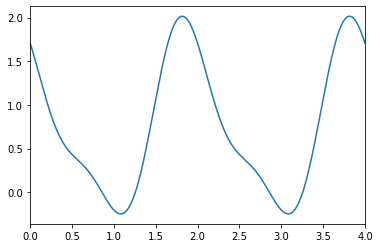

In [30]:
# Hint: for A2 and B2 we can use the functions we defined above to give us the coefficients
A2 = Ak(2)
B2 = Bk(2)
x2 = x1 + A2 * np.cos(np.pi * 2* t) + B2 * np.sin(np.pi * 2 * t)


fig, ax = plt.subplots()
ax.plot(t,x2)
ax.set_xlim(0,4)

You can see that as we add more terms, the reconstructed signal starts to look more like the original signal. However, it's tedious to do each step by hand. Instead, we can automate this in a for loop!

<font color='red'>**Exercise 1.2.5**</font><font color='magenta'> **[3pt]** </font> Create a function that takes as input the number of coefficients to use and outputs a signal reconstructed using that number of Fourier Series coefficients. Use the convention that specifying an input of '0' means that we only give back a signal constructed from the DC term, A_0.

In [31]:
def reconstructed_signal(num_coeffs):
    
    # In all cases add the DC term.
    A_0 = Ak(0)
    x0 = np.ones(length) * A_0/2
    
    x_reconstructed = x0 # this will be the array that is returned out of the function
    
    # Now make a for loop that will run once for each coefficient we wish to add
    for k in range(1, num_coeffs) :
        A_k = Ak(k)
        B_k = Bk(k)
        # As before, we can keep adding on to the signal we reconstructed from the prior coefficients
        x_reconstructed = x_reconstructed + A_k * np.cos(np.pi * k * t) + B_k * np.sin(np.pi * k * t)
        
    return x_reconstructed
    

Now we can easily reconstruct our signal using different numbers of coefficients! 

<font color='red'>**Exercise 1.2.6**</font><font color='magenta'> **[3pt]** </font> Try reconstructions using the first 3 coefficients, the first 10 coefficients, and the first 100 coefficients. How does the reconstruction change as we add more coefficients?

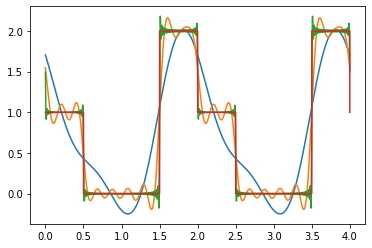

In [32]:
x3 = reconstructed_signal(3)
x10 = reconstructed_signal(10)
x100 = reconstructed_signal(100)



# Now plot these three signals on top of the original signal
fig, ax = plt.subplots()
ax.plot(t,x3)
ax.plot(t, x10)
ax.plot(t, x100)
ax.plot(t,xt)


### 1.3 FFT (BONUS)
**This part is NOT graded. You can try it if you are curious** 

The Fast Fourier Transform (FFT) is an algorithm that computes the frequency spectrum of a discrete signal in a computationally efficient way.

In this part, we will see how the Fourier decomposition that we saw above relates to the FFT output.

<font color='red'>**Exercise 1.3.1**</font> For the same signal $x(t)$ above, define a Python function that computes the Fourier coefficients $C_k$ corresponding to the expansion:

$$
x(t) = C_0 + \sum_{k=1}^{+\infty} C_k \cos(\pi t + \phi_k)
$$

*(Hint: How are the $C_k$'s related to the $A_k$'s and $B_k$'s that you computed earlier?)*

In [ ]:
def Ck(k):
        
    # Handle the special case that k = 0
    if k == 0:
        return ...
    # Otherwise, handle the case that k > 0
    val = ...
    return val

<font color='red'>**Exercise 1.3.2**</font> For the same signal $x(t)$ above, define a Python function that computes the magnitudes $|X_k|$ of the *complex* Fourier coefficients $X_k$ corresponding to the expansion:

$$
x(t) = X_0 + \sum_{k=1}^{+\infty}( X_k e^{j\pi k t} + X_{-k} e^{-j\pi k t} )
$$

*(Hint: How are the $X_k$'s related to the $C_k$'s that you just computed? Remember that the energy is now split into positive and negative frequencies)*

In [ ]:
def Xk_magnitude(k):
    
    # Handle the special case that k = 0
    if k == 0:
        return ...
    # Otherwise, handle the case that k > 0 or k<0
    val = ...
    return val

<font color='red'>**Exercise 1.3.3**</font> Print the magnitudes of the coefficients $X_1,X_2,\ldots,X_{10}$.

In [ ]:
for i in ...
    print(...)

Run the following cell to call the FFT function and to compute the corresponding frequencies

In [ ]:
S_f = np.fft.fft(xt)             # list of FFT coefficients
freqs = fs/N*np.linspace(0,N-1,N) # list of frequencies corresponding to the coefficients returned by fft

<font color='red'>**Exercise 1.3.4**</font> Plot the output of the FFT function in the frequency domain.

In [ ]:
# Plot magnitude of FFT coefficients 
fig, ax = plt.subplots()
ax.plot(...,...)
ax.set_xlabel("f (Hz)")
# ax.set_xlim(0,10)           # you might need to adjust the value here to better see the dominant frequencies

Let us calculate the *normalized* magnitudes of the FFT output.

In [ ]:
S_f_mag_normalized = S_f/N

<font color='red'>**Exercise 1.3.5**</font> Print the first 20 entries of the vector above.

In [ ]:
for ...
    print()

<font color='red'>**Exercise 1.3.6**</font> Can you identify the values of $|X_1|,|X_2|,\ldots,|X_{10}|$ in that list? 
Does this make sense?